## Analysis of Obesity Level based on Eating Habits and Physical Conditions
In this portfolio, I will examine factors that can influence the status of obesity level for the each person. The dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. The objective of this analysis is to know the factors that contribute to the obesity level status the most and analyze the cluster based on the obesity level.

Brief explanation of variables in dataset :
|Column|Meaning|Category|
|:-----:|:-----:|:-----:|
|Gender|Female and Male|Other|
|Age|Age of Individual|Other|
|Height|Height of Individual (metres)|Other|
|Weight|Weight of Individual (kilograms)|Other|
|family_history_with_overweight|A family member has suffered or suffers from overweight|Other|
|FAVC|Frequent consumption of high caloric food|Eating habits|
|FCVC|Frequency of consumption of vegetables|Eating habits|
|NCP|Number of main meals|Eating habits|
|CAEC|Consumption of food between meals|Eating habits|
|SMOKE|cigarette users|Other
|CH2O|Consumption of water daily|Eating habits|
|SCC|Calories consumption monitoring|Physical condition|
|FAF|Physical activity frequency|Physical condition|
|TUE|Time using technology devices|Physical condition|
|CALC|Consumption of alcohol|Eating habits|
|MTRANS|Transportation used|Physical condition|
|NObeyesdad|Obesity level|Other

## Explore and Import Data

In [1]:
# import dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans

ds = '/Users/evelinesetiawan/Downloads/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(ds)

In [2]:
# check if there's outlier and missing value in this dataset
pd.isnull(df).head()
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

***next step is to labeling down some variables that has text value into the numeric value for easier analysis. i decided to use "find and replace" for simplicity for the reader to understand since there are already 17 variables in the dataset.***

In [3]:
cleanup_nums = {"Gender": {"Female": 1, "Male": 2},
                "family_history_with_overweight": {"yes": 1, "no": 2},
                "FAVC": {"yes": 1, "no": 2},
                "CAEC": {"Always": 1, "Frequently": 2, "Sometimes": 3, "no": 4},
                "SMOKE": {"yes": 1, "no": 2},
                "SCC": {"yes": 1, "no": 2},
                "CALC": {"Always": 1, "Frequently": 2, "Sometimes": 3, "no": 4},
                "MTRANS": {"Automobile": 1, "Bike": 2, "Motorbike": 3, "Public_Transportation": 4, "Walking": 5},
                "NObeyesdad": {"Insufficient_Weight": 1, "Normal_Weight": 2, "Obesity_Type_I": 3, "Obesity_Type_II": 4, "Obesity_Type_III": 5, "Overweight_Level_I": 6, "Overweight_Level_II": 7}
               }

In [4]:
df_final = df.replace(cleanup_nums)
df_final.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,2,2.0,3.0,3,2,2.0,2,0.0,1.0,4,4,2
1,1,21.0,1.52,56.0,1,2,3.0,3.0,3,1,3.0,1,3.0,0.0,3,4,2
2,2,23.0,1.80,77.0,1,2,2.0,3.0,3,2,2.0,2,2.0,1.0,2,4,2
3,2,27.0,1.80,87.0,2,2,3.0,3.0,3,2,2.0,2,2.0,0.0,2,5,6
4,2,22.0,1.78,89.8,2,2,2.0,1.0,3,2,2.0,2,0.0,0.0,3,4,7


## Correlation between variables

In [5]:
# print the correlation between NObeyesdad (Obesity Status) with other variables
correlation_1 = df_final.corr()
print(correlation_1['NObeyesdad'].sort_values(ascending=True))

family_history_with_overweight   -0.313667
CALC                             -0.134632
FAF                              -0.129564
NCP                              -0.092616
TUE                              -0.069448
MTRANS                           -0.046202
FAVC                             -0.044582
FCVC                              0.018522
SMOKE                             0.023256
Gender                            0.024908
Height                            0.038986
SCC                               0.050679
CH2O                              0.108868
Age                               0.236170
CAEC                              0.327295
Weight                            0.387643
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64


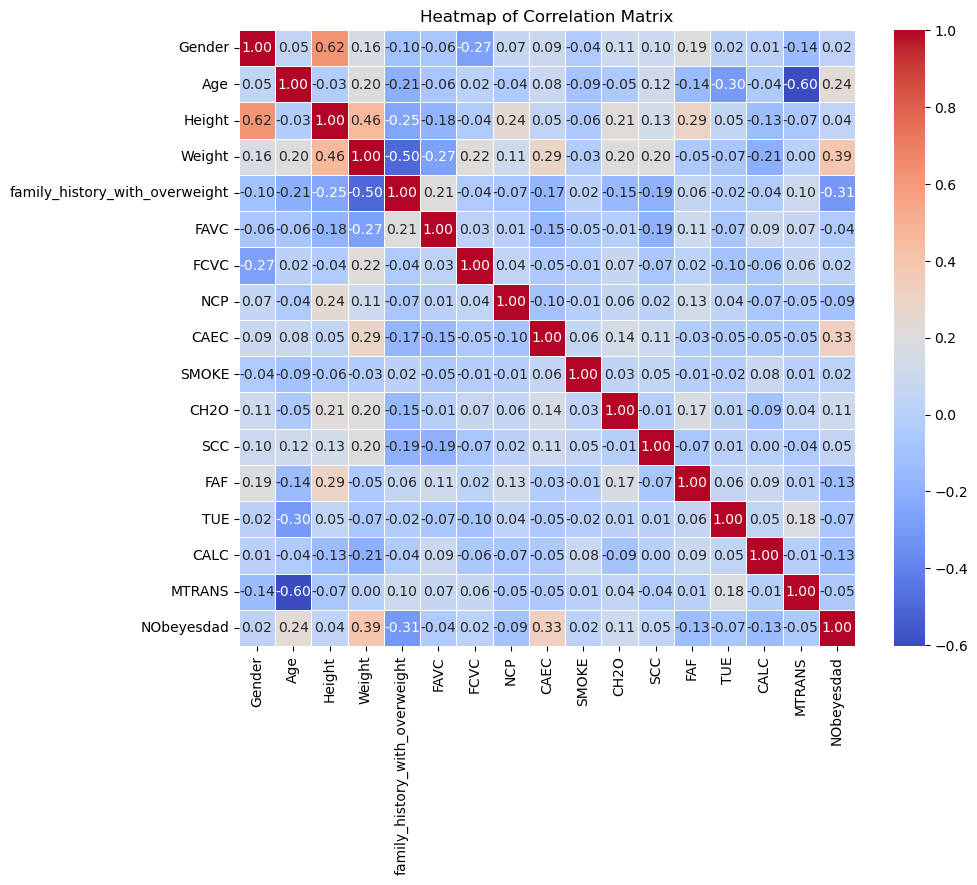

In [6]:
# Visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Correlation Analysis with 'NObeyesdad' as Target Variable
The number shown in the table and visualize by heatmap graph following the correlation analysis in this dataset can be concluded that is not quite signifcant. The strongest variables that correlate achieve almost 40% by Weight and the weakest correlation is hold by FCVC (how often they eat vegetables). 

Subsequent to the result above, i was planned to observing variables that have stronger correlation which value is close to 1 or -1, these variables from the strongest correlation are : Weight, CAEC, family_history_with_overweight and Age. Nonetheless, I changed by observing all variables which the reason will be explained in next markdown **(Analysis of Logistic Regression)**.

## KMeans Clustering

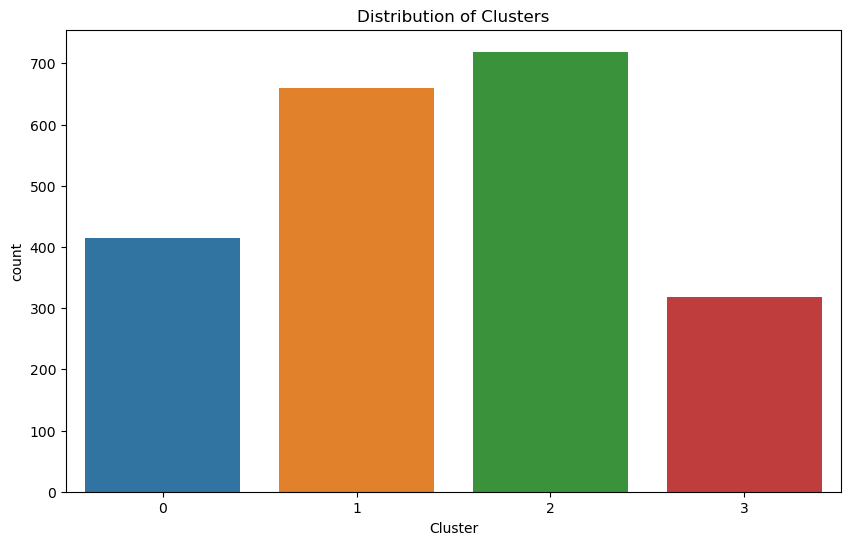

NObeyesdad    1    2    3    4    5    6   7
Cluster                                     
0             4   29  111  103    1   69  97
1             3    9   80  163  323   31  51
2           211  197   95    3    0  114  99
3            54   52   65   28    0   76  43


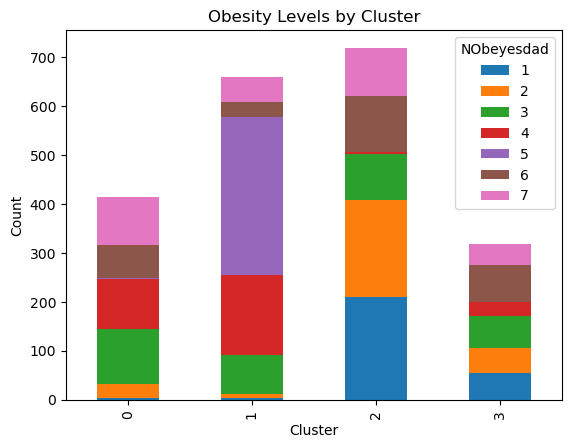

In [7]:
# Assuming certain columns are categorical that need encoding
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
df_final[categorical_cols] = df_final[categorical_cols].apply(lambda x: pd.factorize(x)[0])

# Scale the numerical columns to normalize their scales
scaler = StandardScaler()
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(df_final[numerical_cols + categorical_cols])

# Add the cluster labels to the dataset
df_final['Cluster'] = cluster_labels

# Visualize the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_final)
plt.title('Distribution of Clusters')
plt.show()

# Analyze clusters by obesity levels
cluster_obesity_analysis = df_final.groupby(['Cluster', 'NObeyesdad']).size().unstack(fill_value=0)
print(cluster_obesity_analysis)

# Plot clusters vs obesity levels
cluster_obesity_analysis.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

The provided visualizations from the K-means clustering analysis show distinct lifestyle clusters within the dataset and their correspondence to various obesity levels. Here's a breakdown and interpretation of each graph:

**1. Distribution of Clusters**

This graph shows the count of individuals in each of the 4 identified clusters. The x-axis represents the clusters (0 through 3), and the y-axis represents the number of individuals in each cluster. Each cluster is represented by a different color. Here below are the explaination for each cluster.

  - Cluster 0 have moderate sizes.
  - Cluster 1 and 2 have the highest count, suggesting it includes the lifestyle habits or traits that are most common among the sampled individuals.
  - Clusters 3 has the smallest number of individuals.

**2. Obesity Levels by Cluster**

More analysis would be provided in this second graph. This stacked bar chart displays the distribution of obesity levels (from 1 to 7) within each cluster. The variable of "NObeyesdad" or obesity level will be stated below :
|Obesity Level|Number Level|
|:-----:|:-----:|
|Insufficient_Weight|1|
|Normal_Weight|2|
|Obesity_Type_I|3|
|Obesity_Type_II|4|
|Obesity_Type_III|5|
|Overweight_Level_I|6|
|Overweight_Level_II|7|
***notes : this obesity level has already categorized in the dataset***

Below the analysis of the stacked bar :

  - Cluster 0 is primarily composed of individuals in obesity levels 3 and 4, suggesting a group with medium to high obesity levels.
  - Cluster 1 shows a predominant presence of individuals at the highest obesity levels (4 and 5), indicating this cluster may be associated with the higher severe obesity levels and possibly more detrimental lifestyle traits concerning obesity.
  - Cluster 2 mostly comprises individuals in obesity levels 1 and 2, suggesting that this cluster represents the least obese or normal-weight individuals and followed with the over-weight level 1 and 2.
  - Cluster 3 is relatively mixed, with a presence across several obesity levels, but notably high in levels 6 and 7 as well.


**Conclusions from the Analysis:**
The clusters formed through K-means appear to reflect distinct patterns in lifestyle and physical traits associated with different levels of obesity:

- Cluster 1 being predominant in medium-high level of obesity, this might be engaging in lifestyle behaviors that strongly contribute to higher obesity levels, such as poor dietary habits, low physical activity, etc.
- Cluster 2 seems to include lifestyles conducive to maintaining a healthy weight and also the combination of people who is categorized as over-weight which is possibly lack of physical conditions and bad eating habit.
- Clusters 0 and 3 contain more varied obesity levels but are particularly noteworthy for including higher levels of obesity, suggesting a mixture of traits that contribute both moderately and heavily to obesity.


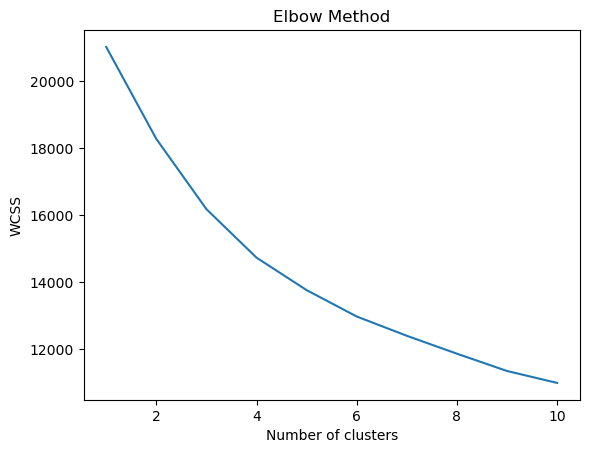

In [8]:
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_final[numerical_cols + categorical_cols])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method graph provided displays the Within-Cluster Sum of Squares (WCSS) plotted against the number of clusters. Based on this graph, we will identify the point where the WCSS begins to decrease more gradually, which is considered the "elbow." This point typically indicates a good balance between the number of clusters and the compactness of those clusters, beyond which adding more clusters doesn't provide substantial improvement in the clustering quality.

The initial drop is seen quite significant and rapid drop in WCSS as the number of clusters increases from 2 to around 4. About the post-elbow behavior, the curve after 4 clusters begins to flatten out somewhat, although it continues to decrease. The reduction in WCSS from increasing the number of clusters beyond 4 is less dramatic compared to the initial reduction from 2 to 4.

The precise "elbow" point isn't always crystal clear, especially in cases where the curve is somewhat gradual, as in your graph. However, looking at the graph, **4 clusters** seem to be a reasonable choice based on the visible change in the slope of the line around that point. Choosing 4 clusters seems to be a good trade-off between having too few clusters (which might oversimplify the diversity in the data) and too many (which might lead to overfitting and less meaningful clusters).

## Logistic Regression
This regression is used for binary or categorical target variables where the outcome falls into discrete classes. In the context of obesity, logistic regression would be used if the target variable is categorical, such as predicting whether an individual is obese or not based on a binary classification. Because the target variable we are using in this model is **"NObeyesdad"** is a categorical data, so logistic regression is chosen for the analysis of this model.

In [9]:
# split dataset in features and target variable
X = df_final.drop('NObeyesdad', axis=1)
y = df_final['NObeyesdad'] 

# split the dataset using training data containing 80% of the entire data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (1688, 17)
X_test : (423, 17)
y_train : (1688,)
y_test : (423,)


In [19]:
# Creating the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Training the model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# train a logistic regression between obesity level and other variables
# Do predictions
train_predictions = logistic_model.predict(X_train)
test_predictions = logistic_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy of Logistic Regression Model :", train_accuracy)
print("Test Accuracy of Logistic Regression Model :", test_accuracy)

Training Accuracy of Logistic Regression Model : 0.9022511848341233
Test Accuracy of Logistic Regression Model : 0.8817966903073287


### Analysis of Logistic Regression

However, i decided to use all variables except 'NObeyesdad' since the model perform well than using 4 variables that has strong correlation with the target variable. When using fewer features can sometimes help in reducing overfitting (where the model learns the noise in the training data rather than the actual signal), leading to better generalization on unseen data. Nevertheless, in this case, seems like using only the four features might be leading to underfitting, where the model is too simple to capture the complexity of the data.

**Logistic Regression**
The training and test accuracy of logistic regression model are quite promising and suggest that the model performs well.
Training accuracy of 90,23% imply the model correctly predicts the obesity category 90.23% of the time on the data it was trained on. A high training accuracy suggests that the model has learned the relationships in the training data effectively. It's capable of capturing the patterns that define different categories of obesity based on the features it was given.

A 88,18% of Test accuracy also indicates the model generalizes to new, unseen data. The test accuracy being slightly lower than the training accuracy is typical in machine learning models, indicating some degree of overfitting to the training data but not excessively so. The fact that it's still quite high suggests that the model generalizes well.

## KNN model
I decided to use KNN model to do model comparison that will allows to compare their performance on the same dataset. Logistic Regression might perform better when the decision boundary is linear, while KNN might excel when the decision boundary is non-linear. Aside from that logistic regression can help understand which features are significant predictors of the outcome, whereas KNN can capture interactions between features that Logistic Regression might miss.

In [18]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the training and test data
train_knn_predictions = knn_model.predict(X_train)
test_knn_predictions = knn_model.predict(X_test)

# Calculate accuracy of the model on training and test data
train_accuracy = accuracy_score(y_train, train_knn_predictions)
test_accuracy = accuracy_score(y_test, test_knn_predictions)

print("Training Accuracy of KNN model :", train_accuracy)
print("Testing Accuracy of KNN model :", test_accuracy)

Training Accuracy of KNN model : 0.8945497630331753
Testing Accuracy of KNN model : 0.8203309692671394


**The relationship between logistic regression and KNN model**

If the logistic regression figures is compared to KNN analysis, it seems a drop in numbers for training and test accuracy. 

||Training Accuracy|Test Accuracy|
|:-----:|:-----:|:-----:|
|Logistic Regression|90,23%|88,18%|
|KNN model|89,46%|82,03%|

However, the gap and drop between those numbers from different model happened because of several reasons :
- There is a possibility that KNN is more prone to overfitting in this case, possibly due to its dependency on the local structure of the training data.
- Differences in assumptions is also cause the gap. Logistic Regression assumes a linear relationship between the input variables and the log odds of the output classes. It’s generally less flexible but more robust to overfitting compared to KNN, particularly when regularization is applied. KNN relies on the assumption that similar data points can be found near each other. It is highly flexible with the risk of overfitting, especially as the dimensionality of the data increases (curse of dimensionality).
- The smaller generalization gap in logistic regression suggests it's better at avoiding overfitting in this scenario compared to KNN. This might be due to effective regularization in logistic regression, which helps limit the model’s complexity.

As a conclusion, this comparative analysis reveals that while both models are competent, logistic regression appears more stable and generalizable under the current setup. 

## RFE
Analyze which the significant factors impacted to the obesity level.

In [21]:
# Select predictors and the target variable
X_rfe = df_final[['Weight', 'CAEC', 'family_history_with_overweight', 'CALC','FAF','NCP','TUE','MTRANS','FAVC','FCVC','SMOKE','Gender','Height','SCC','CH2O','Age']]
y_rfe = df_final['NObeyesdad']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rfe)

In [22]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE with the logistic regression model
rfe = RFE(estimator=logreg, n_features_to_select=1, step=1)
rfe = rfe.fit(X_scaled, y_rfe)

In [23]:
# Feature ranking with RFE
feature_ranking = rfe.ranking_
feature_names = X_rfe.columns

# Combine the rankings and features into a DataFrame for easier viewing
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))

                           Feature  Ranking
0                           Weight        1
12                          Height        2
11                          Gender        3
9                             FCVC        4
15                             Age        5
7                           MTRANS        6
2   family_history_with_overweight        7
5                              NCP        8
4                              FAF        9
3                             CALC       10
8                             FAVC       11
14                            CH2O       12
1                             CAEC       13
6                              TUE       14
13                             SCC       15
10                           SMOKE       16


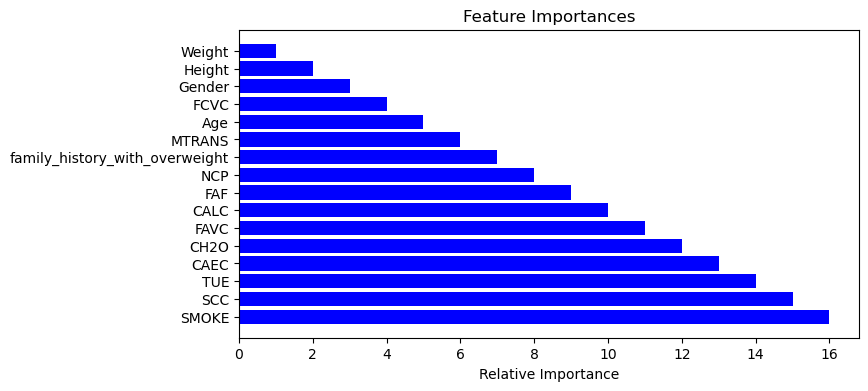

In [17]:
# Data preparation
feature_names = X_rfe.columns
rankings = rfe.ranking_

# Zip and sort by ranking
features_with_rankings = sorted(zip(feature_names, rankings), key=lambda x: x[1])

# Unzip into separate lists
sorted_features, sorted_rankings = zip(*features_with_rankings)

# Plotting feature importance
plt.figure(figsize=(8, 4))
plt.title('Feature Importances')
plt.barh(sorted_features, sorted_rankings, color='b', align='center')
plt.gca().invert_yaxis()  # Invert axis to have the most important at the top
plt.xlabel('Relative Importance')
plt.show()


### RFE Analysis

The bar graph elaborates that among 17 factors in the dataset there are top 4 features that affected the obesity level.
1. Weight: This is the most important feature, with the highest relative importance. This suggests that weight is the strongest predictor of obesity level in the dataset, which is consistent with expectations, as weight is directly related to obesity.
2. Height: The second most important feature, indicating its significant role in determining obesity levels, likely through calculations related to BMI (Body Mass Index).
3. Gender: Also a significant predictor, suggesting differences in obesity levels between genders.
4. FCVC: Frequency of consumption of vegetables, an important dietary factor affecting obesity.

Eating Habits (FCVC, FAVC, CH2O, CAEC):
FAVC (Frequency of consumption of high-caloric food) and FCVC are crucial, but FCVC seems more predictive, possibly indicating that regular vegetable consumption is a more distinguishing factor in obesity levels.
CAEC (Caloric intake monitoring) and CH2O (Hydration) also contribute to the model, reinforcing the role of diet in obesity.

Pyhsical Condition, Lifestyle and Behavior (TUE, SMOKE, SCC):
TUE (Time using electronic devices) has a moderate impact, possibly reflecting sedentary behavior linked to obesity.
SMOKE and SCC have minimal impact, suggesting these factors do not distinguish as much between different obesity levels in this specific dataset.